In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
col_names = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'DepTime', 'DepDelay', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime', 'ArrDelay', 'Cancelled', 'Diverted', 'AirTime', 'Flights', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DivAirportLandings']

In [3]:
file_list = ['../On_Time_On_Time_Performance_2017_1.csv', '../On_Time_On_Time_Performance_2017_2.csv', '../On_Time_On_Time_Performance_2017_3.csv', '../On_Time_On_Time_Performance_2017_4.csv', '../On_Time_On_Time_Performance_2017_5.csv', '../On_Time_On_Time_Performance_2017_6.csv', '../On_Time_On_Time_Performance_2017_7.csv', '../On_Time_On_Time_Performance_2017_8.csv', '../On_Time_On_Time_Performance_2017_9.csv', '../On_Time_On_Time_Performance_2017_10.csv', '../On_Time_On_Time_Performance_2017_11.csv', '../On_Time_On_Time_Performance_2017_12.csv']

In [4]:
#Get Dataframes of all 2017 Months and merge them 
df1 = pd.read_csv(file_list[0], usecols=col_names)[col_names]

In [5]:
df2 = pd.read_csv(file_list[1], usecols=col_names)[col_names]
df3 = pd.read_csv(file_list[2], usecols=col_names)[col_names]
df4 = pd.read_csv(file_list[3], usecols=col_names)[col_names]
df5 = pd.read_csv(file_list[4], usecols=col_names)[col_names]
df6 = pd.read_csv(file_list[5], usecols=col_names)[col_names]
df7 = pd.read_csv(file_list[6], usecols=col_names)[col_names]
df8 = pd.read_csv(file_list[7], usecols=col_names)[col_names]
df9 = pd.read_csv(file_list[8], usecols=col_names)[col_names]
df10 = pd.read_csv(file_list[9], usecols=col_names)[col_names]
df11 = pd.read_csv(file_list[10], usecols=col_names)[col_names]
df12 = pd.read_csv(file_list[11], usecols=col_names)[col_names]

In [6]:
frame = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
merged_df = pd.concat(frame, axis = 0)

In [7]:
merged_df.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,Origin,Dest,DepTime,DepDelay,TaxiOut,...,Diverted,AirTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings
0,1,17,2,AA,494,CLT,PHX,1616.0,-3.0,17.0,...,0.0,244.0,1.0,1773.0,NaN,NaN,NaN,NaN,NaN,0.0
1,1,18,3,AA,494,CLT,PHX,1614.0,-5.0,13.0,...,0.0,228.0,1.0,1773.0,NaN,NaN,NaN,NaN,NaN,0.0
2,1,19,4,AA,494,CLT,PHX,1611.0,-8.0,17.0,...,0.0,236.0,1.0,1773.0,NaN,NaN,NaN,NaN,NaN,0.0
3,1,20,5,AA,494,CLT,PHX,1656.0,37.0,18.0,...,0.0,252.0,1.0,1773.0,33.0,0.0,0.0,0.0,0.0,0.0
4,1,21,6,AA,494,CLT,PHX,1632.0,13.0,17.0,...,0.0,245.0,1.0,1773.0,NaN,NaN,NaN,NaN,NaN,0.0


In [8]:
#Get Flight Number as a combination of Carrier code and individual flight number. E.g 'AA' and '346' becom 'AA346'
merged_df['FlightNumber'] = merged_df['UniqueCarrier'] + merged_df['FlightNum'].astype('str')

In [9]:
merged_df.drop(columns = 'FlightNum', inplace = True)
merged_df.head(3)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,DepTime,DepDelay,TaxiOut,WheelsOff,...,AirTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings,FlightNumber
0,1,17,2,AA,CLT,PHX,1616.0,-3.0,17.0,1633.0,...,244.0,1.0,1773.0,NaN,NaN,NaN,NaN,NaN,0.0,AA494
1,1,18,3,AA,CLT,PHX,1614.0,-5.0,13.0,1627.0,...,228.0,1.0,1773.0,NaN,NaN,NaN,NaN,NaN,0.0,AA494
2,1,19,4,AA,CLT,PHX,1611.0,-8.0,17.0,1628.0,...,236.0,1.0,1773.0,NaN,NaN,NaN,NaN,NaN,0.0,AA494


In [10]:
merged_df.drop(columns = 'DivAirportLandings', inplace = True)
merged_df.head(3)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,DepTime,DepDelay,TaxiOut,WheelsOff,...,Diverted,AirTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightNumber
0,1,17,2,AA,CLT,PHX,1616.0,-3.0,17.0,1633.0,...,0.0,244.0,1.0,1773.0,NaN,NaN,NaN,NaN,NaN,AA494
1,1,18,3,AA,CLT,PHX,1614.0,-5.0,13.0,1627.0,...,0.0,228.0,1.0,1773.0,NaN,NaN,NaN,NaN,NaN,AA494
2,1,19,4,AA,CLT,PHX,1611.0,-8.0,17.0,1628.0,...,0.0,236.0,1.0,1773.0,NaN,NaN,NaN,NaN,NaN,AA494


In [11]:
#Get Flights that have origins from JFK, ORD, DFW, MIA, LAX
subset_df = merged_df[(merged_df['Origin'] == 'JFK') | (merged_df['Origin'] == 'ORD') | (merged_df['Origin'] == 'DFW') | (merged_df['Origin'] == 'MIA') | (merged_df['Origin'] == 'LAX')]

In [12]:
#Sort dataframe by month and by day of month
df_sorted_by_month_day = subset_df.sort_values(['Month', 'DayofMonth'], ascending = [True, True])

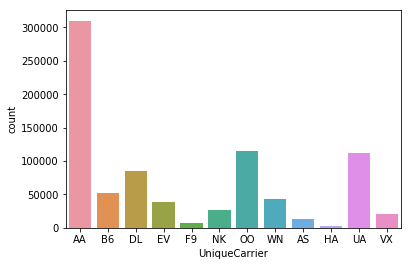

In [13]:
sns.countplot(df_sorted_by_month_day['UniqueCarrier'])

In [14]:
#Drop wheelsoff and wheelson columns as this amounts to the same thing as the Airtime Column
df_sorted_by_month_day.drop(columns = ['WheelsOff', 'WheelsOn'], inplace = True)

In [15]:
#Get final dataframe to be merged and used for analysis with the 'DepDelay' column as the target
final_df = df_sorted_by_month_day[['Month', 'DayofMonth', 'Origin', 'Dest', 'DepTime','DepDelay', 'ArrTime', 'ArrDelay', 'AirTime', 'Flights', 'Distance', 'FlightNumber']]

In [17]:
#Get Scheduled Departure time from Actual Departure time and Departure Delay time
final_df['SchedDepartTime'] = final_df['DepTime'] - final_df['DepDelay']

/Users/shachiakyaagba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
final_df.isnull().sum()

Month              0
DayofMonth         0
Origin             0
Dest               0
DepTime            0
DepDelay           0
ArrTime            0
ArrDelay           0
AirTime            0
Flights            0
Distance           0
FlightNumber       0
SchedDepartTime    0
dtype: int64

In [20]:
#Get rid of all nan values
final_df.dropna(axis = 0, inplace = True)

/Users/shachiakyaagba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
final_df['hour'] = final_df['DepTime'] // 100
    

/Users/shachiakyaagba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
final_df.head()

,Month,DayofMonth,Origin,Dest,DepTime,DepDelay,ArrTime,ArrDelay,AirTime,Flights,Distance,FlightNumber,SchedDepartTime,hour
104,1,1,DFW,SFO,2205.0,-3.0,23.0,25.0,223.0,1.0,1464.0,AA499,2208.0,22.0
169,1,1,LAX,OMA,1813.0,-7.0,2307.0,-31.0,152.0,1.0,1330.0,AA501,1820.0,18.0
297,1,1,LAX,CMH,936.0,-9.0,1653.0,-14.0,223.0,1.0,1995.0,AA508,945.0,9.0
350,1,1,DFW,CLE,1059.0,-6.0,1416.0,-19.0,114.0,1.0,1021.0,AA511,1065.0,10.0
360,1,1,DFW,PHX,2034.0,14.0,2210.0,12.0,128.0,1.0,868.0,AA513,2020.0,20.0


In [40]:
final_df.drop(columns = 'Flights', inplace = True)

/Users/shachiakyaagba/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [41]:
final_df[final_df['DepTime']==2359]

,Month,DayofMonth,Origin,Dest,DepTime,DepDelay,ArrTime,ArrDelay,AirTime,Distance,FlightNumber,SchedDepartTime,hour
253792,1,1,JFK,BQN,2359.0,0.0,422.0,-21.0,181.0,1576.0,B6839,2359.0,23.0
64229,1,2,DFW,LAS,2359.0,62.0,117.0,87.0,179.0,1055.0,NK817,2297.0,23.0
53211,1,5,DFW,DEN,2359.0,314.0,103.0,301.0,93.0,641.0,F9131,2045.0,23.0
64982,1,7,ORD,DFW,2359.0,204.0,203.0,176.0,105.0,802.0,NK903,2155.0,23.0
88169,1,7,LAX,IAH,2359.0,0.0,505.0,-8.0,157.0,1379.0,UA717,2359.0,23.0
150650,1,11,JFK,SJU,2359.0,0.0,426.0,-19.0,188.0,1598.0,B61503,2359.0,23.0
146239,1,12,LAX,ANC,2359.0,14.0,429.0,-1.0,310.0,2345.0,AS175,2345.0,23.0
150651,1,12,JFK,SJU,2359.0,0.0,433.0,-12.0,190.0,1598.0,B61503,2359.0,23.0
252607,1,14,JFK,PSE,2359.0,8.0,512.0,33.0,197.0,1617.0,B6745,2351.0,23.0
120,1,18,DFW,SFO,2359.0,114.0,137.0,98.0,196.0,1464.0,AA499,2245.0,23.0
